#  IN3050/IN4050 Mandatory Assignment 1: Traveling Salesman Problem


## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

Especially, notice that you are **not allowed to use code or parts of code written by others** in your submission. We do check your code against online repositories, so please be sure to **write all the code yourself**. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo": https://www.uio.no/english/studies/examinations/cheating/index.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, February 24 2023, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

### What to deliver?

You are recommended to solve the exercise in a Jupyter notebook, but you might solve it in a Python program if you prefer.

If you choose Jupyter, you should deliver the notebook. You should answer all questions and explain what you are doing in Markdown. Still, the code should be properly commented. The notebook should contain results of your runs. In addition, you should make a pdf of your solution which shows the results of the runs.

If you prefer not to use notebooks, you should deliver the code, your run results, and a pdf-report where you answer all the questions and explain your work.

Your report/notebook should contain your name and username.

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which contains your complete solution.

Important: if you weren’t able to finish the assignment, use the PDF report/Markdown to elaborate on what you’ve tried and what problems you encountered. Students who have made an effort and attempted all parts of the assignment will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You may use whichever programming language you like, but we strongly suggest that
you try to use Python, since you will be required to write the second assignment in Python. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesman, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. If you use Python, the **itertools** module provides
a permutations function that returns successive permutations, this is useful for exhaustive search)

## Helper code for visualizing solutions

Here follows some helper code that you can use to visualize the plans you generate. These visualizations can **help you check if you are making sensible tours or not**. The optimization algoritms below should hopefully find relatively nice looking tours, but perhaps with a few visible inefficiencies.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#Map of Europe
europe_map =plt.imread('map.png')

#Lists of city coordinates
city_coords={"Barcelona":[2.154007, 41.390205], "Belgrade": [20.46,44.79], "Berlin": [13.40,52.52], "Brussels":[4.35,50.85],"Bucharest":[26.10,44.44], "Budapest": [19.04,47.50], "Copenhagen":[12.57,55.68], "Dublin":[-6.27,53.35], "Hamburg": [9.99, 53.55], "Istanbul": [28.98, 41.02], "Kiev": [30.52,50.45], "London": [-0.12,51.51], "Madrid": [-3.70,40.42], "Milan":[9.19,45.46], "Moscow": [37.62,55.75], "Munich": [11.58,48.14], "Paris":[2.35,48.86], "Prague":[14.42,50.07], "Rome": [12.50,41.90], "Saint Petersburg": [30.31,59.94], "Sofia":[23.32,42.70], "Stockholm": [18.06,60.33],"Vienna":[16.36,48.21],"Warsaw":[21.02,52.24]}

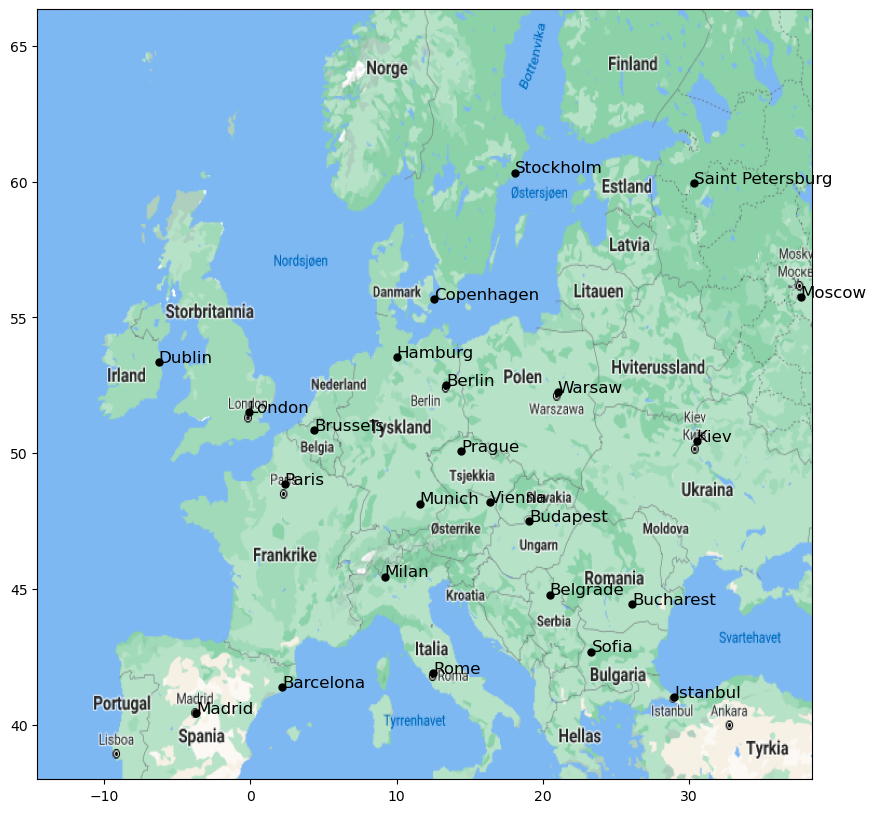

In [2]:
#Helper code for plotting plans
#First, visualizing the cities.
import csv
with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))
    cities = data[0]
    
fig, ax = plt.subplots(figsize=(10,10))

ax.imshow(europe_map, extent=[-14.56,38.43, 37.697 +0.3 , 64.344 +2.0], aspect = "auto")



# Map (long, lat) to (x, y) for plotting
for city,location in city_coords.items():
    x, y = (location[0], location[1])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, city, fontsize=12);

In [3]:
#A method you can use to plot your plan on the map.
def plot_plan(city_order):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(europe_map, extent=[-14.56,38.43, 37.697 +0.3 , 64.344 +2.0], aspect = "auto")

    # Map (long, lat) to (x, y) for plotting
    for index in range(len(city_order) -1):
        current_city_coords = city_coords[city_order[index]]
        next_city_coords = city_coords[city_order[index+1]]
        x, y = current_city_coords[0], current_city_coords[1]
        #Plotting a line to the next city
        next_x, next_y = next_city_coords[0], next_city_coords[1]
        plt.plot([x,next_x], [y,next_y])
        
        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, index, fontsize=12);
    #Finally, plotting from last to first city
    first_city_coords = city_coords[city_order[0]]
    first_x, first_y = first_city_coords[0], first_city_coords[1]
    plt.plot([next_x,first_x],[next_y,first_y])
    #Plotting a marker and index for the final city
    plt.plot(next_x, next_y, 'ok', markersize=5)
    plt.text(next_x, next_y, index+1, fontsize=12);
    plt.show();

['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul', 'Kiev', 'London', 'Madrid', 'Milan', 'Moscow', 'Munich', 'Paris', 'Prague', 'Rome', 'Saint Petersburg', 'Sofia', 'Stockholm', 'Vienna', 'Warsaw']


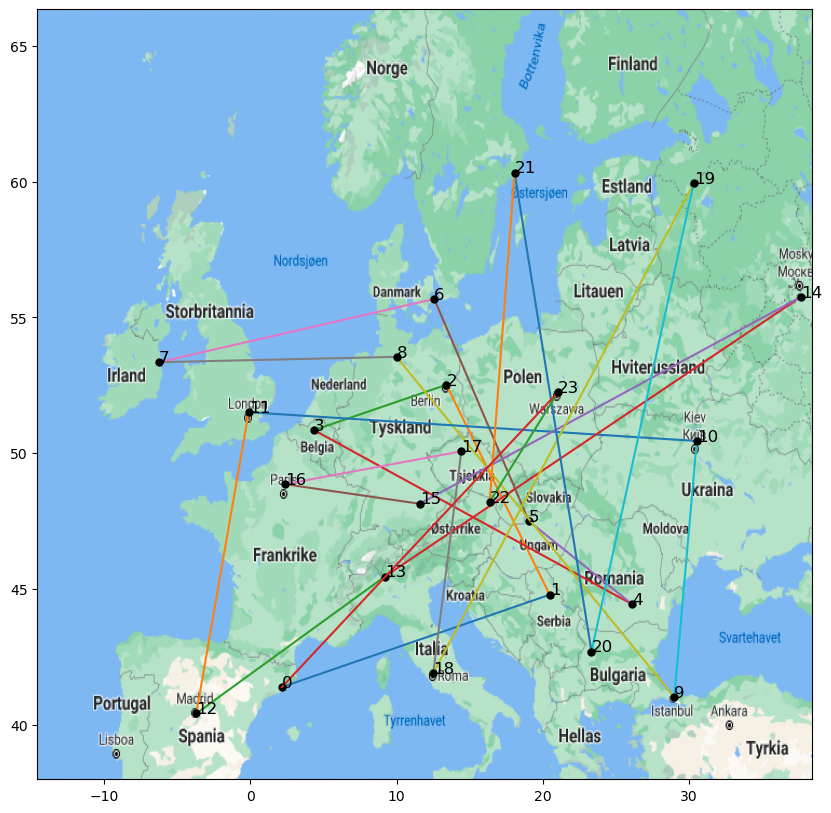

In [4]:
#Example usage of the plotting-method.
plan = list(city_coords.keys()) # Gives us the cities in alphabetic order
print(plan)
plot_plan(plan)

## Exhaustive Search
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases. Plot the shortest tours you found using the plot_plan method above, for 6 and 10 cities.

In [6]:
# Implement the algorithm here

import csv
import time
import itertools

file = open("european_cities.csv", "r")

# Creates a way of finding city distances using indexing with city names.
cities_list = list(csv.reader(file, delimiter=";"))
index_dict = {}
counter = 0
for city_name in cities_list[0]:
    index_dict[city_name] = counter
    counter += 1
cities_dist = cities_list[1:]
# Example index: print(cities_dist[index_dict["Bucharest"]][index_dict["Berlin"]])


def find_total_distance(permutation, cities_dist, index_dict) -> float:
    """Function used to return the total distance in a permutation."""
    
    counter = 0
    cities_order = ""
    for i in range(len(permutation)):
        if i < (len(permutation) - 1):
            city1 = permutation[i]
            city2 = permutation[i + 1]
            distance_found = float(cities_dist[index_dict[city1]][index_dict[city2]])
            counter += distance_found
    counter += float(cities_dist[index_dict[permutation[0]]][index_dict[permutation[-1]]])  # First and last city

    return counter


def exhaustive_search(permutations, cities_dist, index_dict):
    """Performs an exhaustive search on the permutation, measures time, and plots the tour."""
    
    # Starts the program timer
    start_time = time.time()

    # Performs exhaustive search.
    total_distance = 99999999999999999
    best_perm = ...
    for perm in city_permutations:
        current_distance = find_total_distance(perm, cities_dist, index_dict)
        if current_distance < total_distance:
            total_distance = current_distance
            #print(total_distance)
            best_perm = perm
    print(f"Found best permutation {best_perm} of distance: {total_distance}")

    # Measuring the time.
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Elapsed time of exhaustive search: {elapsed_time} seconds")

    # Plots the visualization of the permutation.
    plot_plan(best_perm)
    

Found best permutation ('Barcelona', 'Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Brussels') of distance: 5018.8099999999995
Elapsed time of exhaustive search: 0.00199127197265625 seconds


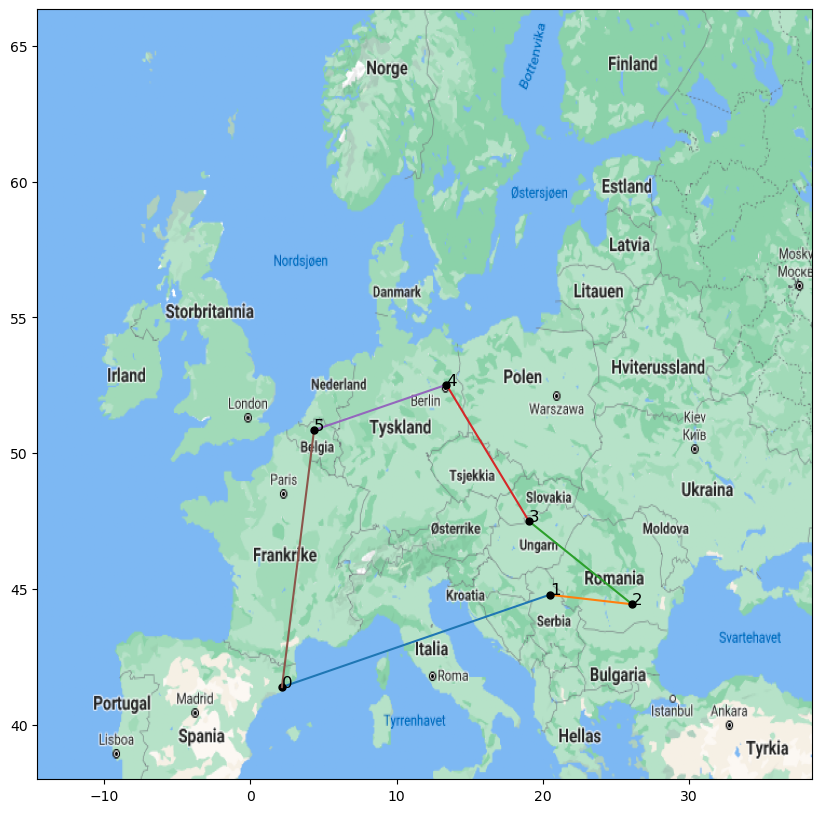

In [7]:
### Performs exhaustive search on the first 6 cities, measure time taken, and plots.

# Finds a permutation of the 6 first cities, and performs an exhaustive search.
city_permutations = itertools.permutations(cities_list[0][0:6])
exhaustive_search(city_permutations, cities_dist, index_dict)

Found best permutation ('Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin') of distance: 7486.309999999999
Elapsed time of exhaustive search: 14.664999723434448 seconds


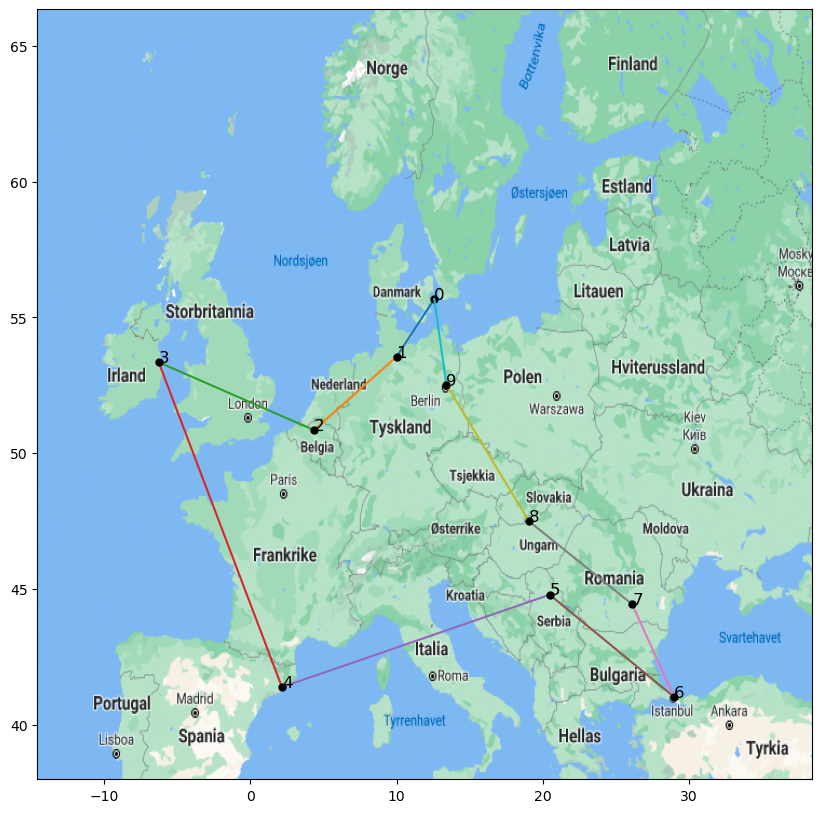

In [8]:
### Performs exhaustive search on the first 10 cities, measure time taken, and plots.

# Finds a permutation of the 10 first cities, and performs an exhaustive search.
city_permutations = itertools.permutations(cities_list[0][0:10])
exhaustive_search(city_permutations, cities_dist, index_dict)

What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?

#### Answer

The shortest tour of the first 10 cities had a total distance of 7486.3 kilometres, and spanned out in the following sequence: Copenhagen -> Hamburg -> Brussels -> Dublin -> Barcelona -> Belgrade -> Istanbul -> Bucharest -> Budapest -> Berlin.

This calculation takes approximately 15 seconds to perform.

##### The time it would take to perform an exhaustive search on all 24 cities:

If we go by the notion of time complexity with big O notation. The travelling salesman problem with a time complexity of O(N!) will with 10 cities have a worst case of 10!, approximately 3.6+e6 searches. 24 cities will yield a worst case of 24!, approximately 6.2e+24. We can then take our worst case time of 15 seconds, multiply with (6.2e+24 / 3.6e+6) = 1.7e+18, resulting in a worst case time of 15 * 1.7e+18 = 2.6e+19 seconds. It is safe to say that this calculation would prove impossible to perform.

## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the length of the tour of the best,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**. Plot one of the the plans from the 20 runs for both 10 cities and 24 cities (you can use plot_plan). 

In [9]:
# Implement the algorithm here

### This implementation does not use itertools.

import random

def simple_hill_climbing (cities_list, cities_dist, index_dict, number_of_cities, number_of_chances):
    # Starts the program timer.
    start_time = time.time()
    
    # Finds a random permutation.
    permutation = cities_list[0][0:number_of_cities]
    random.shuffle(permutation)
    best_perm = permutation
    total_dist = find_total_distance(best_perm, cities_dist, index_dict)

    counter = number_of_chances
    while counter != 0:
        # Finds two positions to swap randomly.
        pos1 = random.randint(0, len(best_perm) - 1)
        pos2 = pos1
        while pos2 == pos1:
            pos2 = random.randint(0, len(best_perm) - 1)

        # Swaps the two cities in a clone of the current permutation.
        city1 = best_perm[pos1]
        city2 = best_perm[pos2]
        new_perm = best_perm.copy()  # Makes new temporary permutaion.
        new_perm[pos1] = city2
        new_perm[pos2] = city1

        # Compare distances with new_perm and best_perm.
        new_dist = find_total_distance(new_perm, cities_dist, index_dict)
        if new_dist < total_dist:
            best_perm = new_perm
            total_dist = new_dist
            counter = number_of_chances
            checked_swaps = []  # Clears the list
            
            #print(f"Found new best distance: {total_dist}")
            
        else:  # If it fails after "number_of_chances" swaps, it will end the algorithm.
            counter -= 1

    # Measuring the time.
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # List containing best permutation and shortest distance.
    results = [best_perm, total_dist, elapsed_time]
    return results


In [10]:
def test_hill_climber(cities_list, cities_dist, index_dict, number_of_cities):
    """Method to run 20 runs, measure best, mean and worst, and plot to best, of n amount of cities."""

    # Stores all "best" tours, their distances and elapsed times 20 times
    resulting_tours = []
    resulting_distances = []
    resulting_times = []
    for _ in range (0, 20):
        result = simple_hill_climbing(cities_list, cities_dist, index_dict, number_of_cities, 500)
        current_tour = result[0]
        current_distance = result[1]
        current_time = result[2]
        resulting_tours.append(current_tour)
        resulting_distances.append(current_distance)
        resulting_times.append(current_time)
    
    # Calculates best distance. for loop needed for finding index.
    best_distance = 999999999
    best_index = ...  # Needed for plotting the best tour.
    for i in range(0, len(resulting_distances)):
        current_distance = resulting_distances[i]
        if current_distance < best_distance:
            best_distance = current_distance
            best_index = i
    
    # Calculates worst and mean distances.
    worst_distance = max(resulting_distances)
    mean_distance = sum(resulting_distances) / len(resulting_distances)
    
    # Calculates mean time.
    mean_time = sum(resulting_times) / len(resulting_times)
    
    # Prints the results
    print(f"Best distance found: {best_distance}")
    print(f"Worst distance found: {worst_distance}")
    print(f"Mean distance found: {mean_distance}")
    print(f"Mean time spent per run: {mean_time} seconds")
    
    # Plots the best tour.
    best_tour = resulting_tours[best_index]
    print("Plotting the best tour found:")
    plot_plan(best_tour)
    
    

Best distance found: 7486.3099999999995
Worst distance found: 8419.09
Mean distance found: 7670.770500000001
Mean time spent per run: 0.003951966762542725 seconds
Plotting the best tour found:


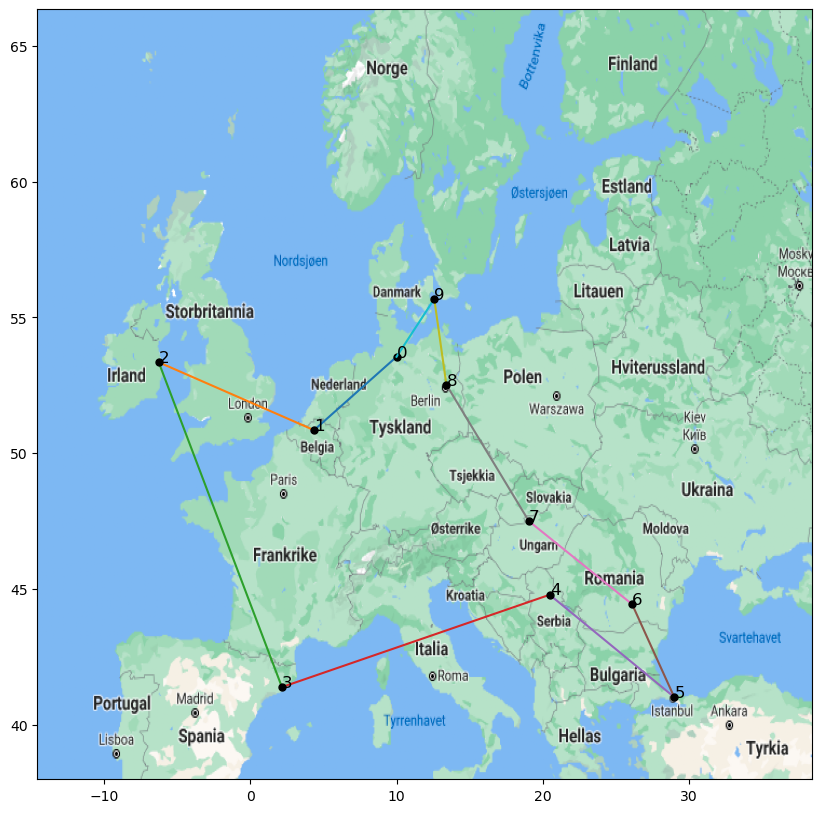

In [11]:
# Tests the hill climber on the 10 first cities.

test_hill_climber(cities_list, cities_dist, index_dict, 10)

Best distance found: 13219.2
Worst distance found: 16744.13
Mean distance found: 14689.188000000004
Mean time spent per run: 0.01665165424346924 seconds
Plotting the best tour found:


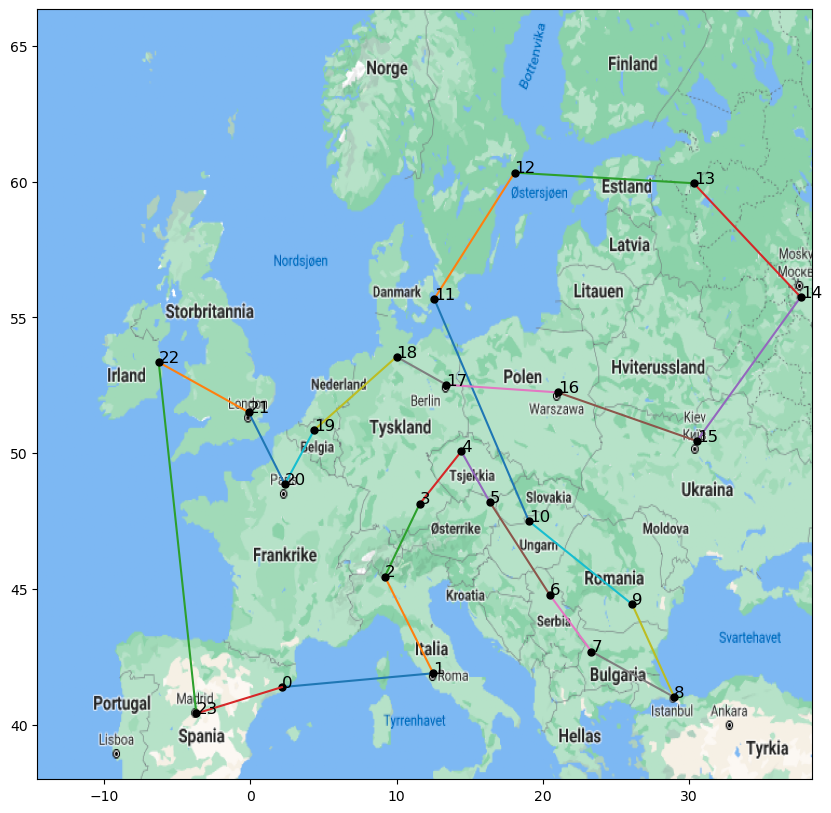

In [12]:
# Tests the hill climber on all 24 cities.

test_hill_climber(cities_list, cities_dist, index_dict, 24)

## Answer

Compared to the exhaustive search on the first 10 cities, the hill climber wins grandiousely with a time of 0.004 seconds per run versus the 15 seconds of the exhaustive search. The hill climber will most of the time also end up finding the best solution (this is not the case with 24 cities).

### My ideas regarding this hill climber

For each best permutation found, the alorithm is given 500 chances to find a better neighbour by swapping two cities. If the count goes down to 0, the algorithm is done. It is allowed to check for the same swapping pattern multiple times in those 500 chances, since hindering this "fault" would prove impractical in case of time complexity.

## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. Conclude which is best in terms of tour length and number of generations of evolution
time.

Finally, plot an example optimized tour (the best of the final generation) for the three different population sizes, using the plot_plan method.

In [262]:
# Implement the algorithm here

# THIS PSEUDOCODE IS WRITTEN BY CHRISRLE
#
# CREATE "population" variable
# LOOP 100 times
#
#     parent = parent_selection(population)  # Using ranking system instead of fitness value directly
#     offspring = offspring_generation(parents)  # Using PMX crossover for mutation
#     population = suvival_selection(population, offspring)
#
# RETURN population

### This implementation does not use itertools.

def bubble_sort_double(permutation_list, distance_list):
    "Bubble sort inspired by pseudocode from IN2010 lecture slides."
    size = len(permutation_list)
    for i in range(0, size - 2):
        for j in range(0, size - i - 2):
            if distance_list[j] > distance_list[j + 1]:
                # Updating permutation_list
                permutation1 = permutation_list[j]
                permutation2 = permutation_list[j + 1]
                permutation_list[j] = permutation2
                permutation_list[j + 1] = permutation1
                
                # Updating distance_list
                distance1 = distance_list[j]
                distance2 = distance_list[j + 1]
                distance_list[j] = distance2
                distance_list[j + 1] = distance1
    return permutation_list
                

def tournament_selection(population, cities_dist, index_dict):
    """Finds the 5 best solutions out of 30 random from the population."""
    
    # Picks 30 members at random and then sorts the dictionary with regards to distances.
    applicants = []
    applicant_distances = []
    used_indexes = []  # Makes sure to not pick one solution multiple times internally in this method.
    for _ in range(0, 30):
        index = random.randint(0, len(population) - 1)
        while index in used_indexes:
            index = random.randint(0, len(population) - 1)
        used_indexes.append(index)
        permutation = population[index]
        applicants.append(permutation)
        applicant_distances.append(find_total_distance(permutation, cities_dist, index_dict))

    # Sorts the applicants list based on the sorting of applicant_distances.
    tournament_winners = bubble_sort_double(applicants, applicant_distances)
    
    return tournament_winners[0:5]  # Returns the 5 best tournament applicants.
                

def partially_mapped_crossover(parent1, parent2):
    """Creates one offspring based on two parents keeping adjacency."""
    
    # Finding positions for segment of parent 1. parent1[pos1: pos2]
    pos1 = random.randint(0, len(parent1) - 2)  # We want pos2 > pos1 + 1.
    pos2 = pos1
    while not (pos2 > pos1 + 1):
        pos2 = random.randint(0, len(parent1))
    
    # Makes a copy of the parent1 with only that segment intact.  CORRECT!!!!
    child = parent1.copy()
    for i in range(0, len(child)):
        child[i] = 0
    for i in range(pos1, pos2):
        child[i] = parent1[i]
    
    # Finds the elements i in the segment of parent2 that are not in the child.  CORRECT!!!!
    position_element_i = dict()  # Dict on the form {i: index of i}
    for index in range(pos1, pos2):
        element_i = parent2[index]
        if element_i not in child:
            position_element_i[element_i] = index
    
    # Finds the elements j in child that are in the 
    # same index position as the elements i are in parent2.  CORRECT!!!!
    dict_element_i_j = dict()  # Dict on the form {i: j}
    for element_i, index in position_element_i.items():
        element_j = child[index]
        dict_element_i_j[element_i] = element_j

    # Places element i in child at position where j is located in P2.
    for element_i, element_j in dict_element_i_j.items():
        #print(f"Element i: {element_i}")
        #print(f"Element j: {element_j}")
        # Searches for the position of j in parent2.
        correct_position = ...
        for index in range(0, len(parent2)):  # Searches for location of j in parent2
            if parent2[index] == element_j:
                correct_position = index
        
        # If that position in the child is occupied by value k, we must find where in parent2
        # the value k is, and put element i in that position of child instead.
        while child[correct_position] != 0:
            element_k = child[correct_position]
            for index in range(0, len(parent2)):  # Searches for location of k in parent2
                if parent2[index] == element_k:
                    correct_position = index
                    
        child[correct_position] = element_i
        
    # Filling in the rest from parent2
    for i in range(0, len(child)):
        if child[i] == 0:
            child[i] = parent2[i]

    # Returns the offspring
    set_child = set(child)
    if len(set_child) < len(child):
        print("DUPLICATE CREATED")
    return child


def scramble_mutation(offspring):
    """Scrambles a random subset of the offspring in 10% of cases."""
    
    chance = random.randint(1, 10)
    
    # Scrambles offspring if 5
    if chance == 5:
        # Finds a random subset of offspring and shuffles it
        pos1 = random.randint(0, len(offspring) - 2)  # We want pos2 > pos1 + 1.
        pos2 = pos1
        while not (pos2 > pos1 + 1):
            pos2 = random.randint(0, len(offspring))
        subset = offspring[pos1: pos2]
        random.shuffle(subset)
        
        # Inserts the shuffles subset into offspring
        counter = 0
        for i in range(pos1, pos2):
            offspring[i] = subset[counter]
            counter += 1
    
    # Returns the offspring whether it is scrambled or not.
    return offspring

        
def genetic_algorithm(cities_list, cities_dist, index_dict, number_of_cities):
    
    # Generates a population of 100 permutations.
    population = []
    for _ in range(0, 1000):
        permutation = cities_list[0][0: number_of_cities]
        random.shuffle(permutation)
        population.append(permutation)
    
    # Performs parent selection and survivor selection for 100 generations.
    for i in range(0, 100):
        
        # Parent selection. Using Tournament Selection with replacement outside of the method.
        parents = []
        for _ in range(0, 4):  # We want 20 parents. Gathers 5 parents 4 times.
            tournament_winners = tournament_selection(population, cities_dist, index_dict)
            for winner in tournament_winners:
                parents.append(winner)
        
        # Mutation / Offspring generation. We want 50 offsprings.
        offsprings = []
        for _ in range(0, 25):
            # Randomly selects two parents.
            pos1 = random.randint(0, len(parents) - 1)
            pos2 = pos1
            while pos2 == pos1:
                pos1 = random.randint(0, len(parents) - 1)
            parent1, parent2 = parents[pos1], parents[pos2]
            
            # Combines the parents using partially mapped crossover (PMX).
            offspring1 = partially_mapped_crossover(parent1, parent2)
            offspring2 = partially_mapped_crossover(parent2, parent1)
            
            # Uses scramble mutation 10% of the time
            offspring1 = scramble_mutation(offspring1)
            offspring2 = scramble_mutation(offspring2)
            
            offsprings.append(offspring1)
            offsprings.append(offspring2)
            
        # Survivor selection.
        survival_participants = population + offsprings
        survival_distances = []
        
        for j in range (0, len(survival_participants)):
            permutation = survival_participants[j]
            survival_distances.append(find_total_distance(permutation, cities_dist, index_dict))
        sorted_survivors = bubble_sort_double(survival_participants, survival_distances)
        new_population = sorted_survivors[0:100]
        
        # Set survivor population as the new population.
        population = new_population
    
    best_tour = population[0]
    best_distance = find_total_distance(permutation, cities_dist, index_dict)
    print(f"Found best tour {best_tour}")
    print(f"Found shortest distance {best_distance}")
    plot_plan(best_tour)

Found best tour ['Bucharest', 'Istanbul', 'Belgrade', 'Barcelona', 'Dublin', 'Brussels', 'Hamburg', 'Copenhagen', 'Berlin', 'Budapest']
Found shortest distance 7486.310000000001


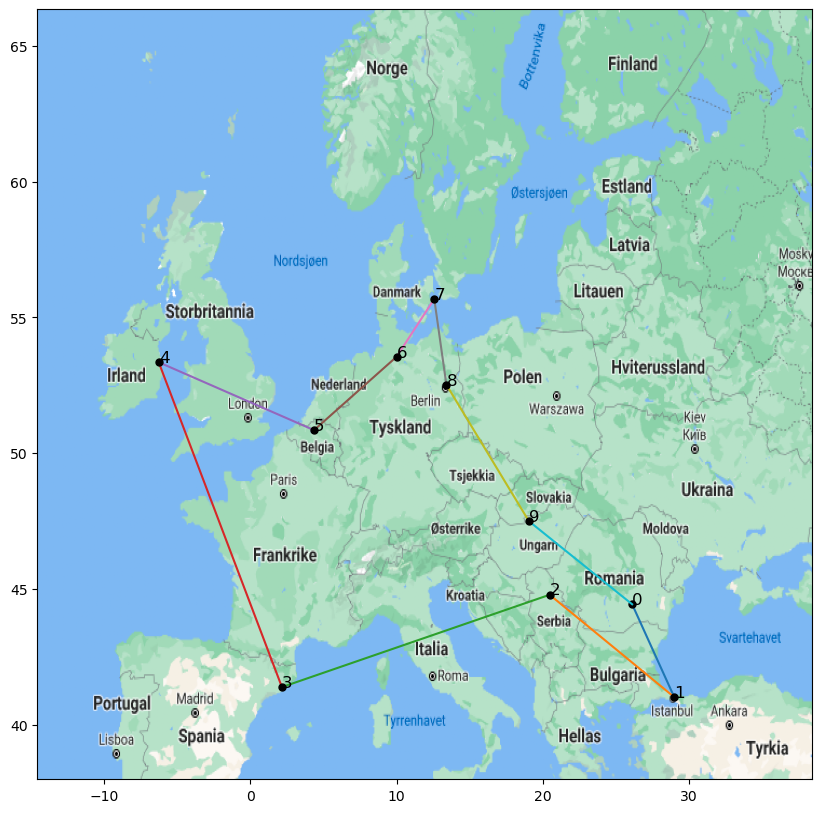

In [287]:
### Calls the GA on 10 cities.

genetic_algorithm(cities_list, cities_dist, index_dict, 10)

Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

How many tours were inspected by your GA as compared to by the exhaustive search?

In [ ]:
# Answer

## Hybrid Algorithm (IN4050 only)
### Lamarckian
Lamarck, 1809: Traits acquired in parents’ lifetimes can be inherited by offspring. In general the algorithms are referred to as Lamarckian if the result of the local search stage replaces the individual in the population.
### Baldwinian
Baldwin effect suggests a mechanism whereby evolutionary progress can be guided towards favourable adaptation without the changes in individual's fitness arising from learning or development being reflected in changed genetic characteristics. In general the algorithms are referred to as Baldwinian if the original member is kept, but has as its fitness the value belonging to the outcome of the local search process.


(See chapter 10 and 10.2.1 from Eiben and Smith textbook for more details. It will also be lectured in Lecure 4)

### Task
Implement a hybrid algorithm to solve the TSP: Couple your GA and hill climber by running the hill climber a number of iterations on each individual in the population as part of the evaluation. Test both Lamarckian and Baldwinian learning models and report the results of both variants in the same way as with the pure GA (min,
max, mean and standard deviation of the end result and an averaged generational plot). How do the results compare to that of the pure GA, considering the number of evaluations done?

In [ ]:
# Implement algorithm here